In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as accuracy_score
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
pop = pd.read_csv('World_Pop.csv')
pop.head()

,Series Name,Series Code,Time,Time Code,World [WLD]
Population,total,SP.POP.TOTL,2000,YR2000,6115108363
Population,total,SP.POP.TOTL,2001,YR2001,6194460444
Population,total,SP.POP.TOTL,2002,YR2002,6273526441
Population,total,SP.POP.TOTL,2003,YR2003,6352677699
Population,total,SP.POP.TOTL,2004,YR2004,6432374971


In [3]:
pop2 = pop.drop(['Series Name', 'Series Code', 'Time Code'], axis = 1)
pop2.head()

,Time,World [WLD]
Population,2000,6115108363
Population,2001,6194460444
Population,2002,6273526441
Population,2003,6352677699
Population,2004,6432374971


In [4]:
Xp = pop2.iloc[:-1, :]
Xp
Xp.dtypes

Time            int64
World [WLD]    object
dtype: object

In [5]:
X = Xp.iloc[:, :-1]
y = Xp.iloc[:, 1]
#y

In [6]:
type(Xp)

pandas.core.frame.DataFrame

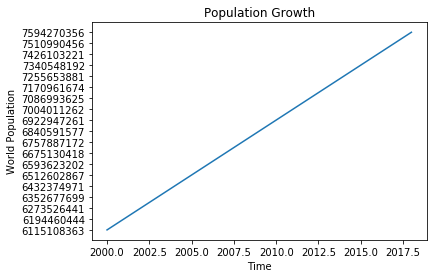

In [7]:
ppltn = Xp['World [WLD]'].str.strip()
plt.plot(Xp.Time,ppltn)
plt.xlabel('Time') 
plt.ylabel('World Population') 
plt.title('Population Growth') 
#plt.legend()
plt.show()

In [8]:
X = pop2.iloc[:-1, 0].values.reshape(-1, 1)
y = pop2.iloc[:-1, 1].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = regressor.predict(X_test)
y_pred

array([[6.92747143e+09],
       [6.18590835e+09]])

In [11]:
regressor.coef_

array([[82395898.66248827]])

In [12]:
regressor.intercept_

array([-1.58688285e+11])

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9996472291128745

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6538135.481201172
Mean Squared Error: 46803263852288.336
Root Mean Squared Error: 6841291.095421122


In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6922947261,6.927471e+09
1,6194460444,6.185908e+09


In [16]:
for x in range(len(y_pred)):
    print(y_pred[x], X_test[x], y_test[x])

[6.92747143e+09] [2010] ['6922947261']
[6.18590835e+09] [2001] ['6194460444']


In [17]:
X_test
y_test

array([['6922947261'],
       ['6194460444']], dtype=object)

In [18]:
asd = [2019, 2020]
y_predict = regressor.intercept_ + regressor.coef_ * asd

In [19]:
y_predict

array([[7.66903452e+09, 7.75143042e+09]])

In [20]:
df2 = pd.DataFrame({'Predicted': y_predict.flatten()})
df2['Year'] = df2.index + 2019
df2

,Predicted,Year
0,7.669035e+09,2019
1,7.751430e+09,2020


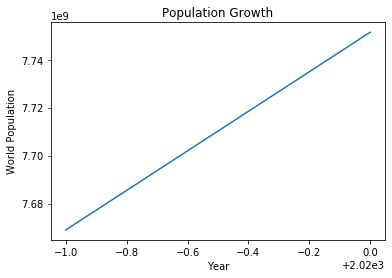

In [21]:
ppltn2 = df2['Predicted']
plt.plot(df2.Year,ppltn2)
plt.xlabel('Year') 
plt.ylabel('World Population') 
plt.title('Population Growth') 
#plt.legend()
plt.show()

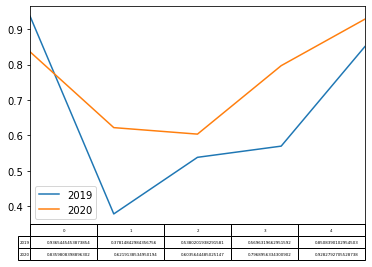

In [22]:
fig, ax = plt.subplots(1, 1)
df2 = pd.DataFrame(np.random.rand(5, 2), columns=['2019', '2020'])
ax.get_xaxis().set_visible(False)   # Hide Ticks
df2.plot(table=True, ax=ax)